In [120]:
import pandas as pd 
import numpy as np
from numpy.random import seed # for reproducible results
seed(1)
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import glob

In [96]:
preds = pd.read_csv('all_models_all_yearsinfl_tp1_predictions3.csv', index_col=0)
preds.index = pd.to_datetime(preds.index, format='%Y-%m-%d')

In [43]:
preds.loc[:, 'Linear Regression':'AR_p'].mean(axis=1)

date
1990-01-01    0.005411
1990-02-01    0.005243
1990-03-01    0.003434
1990-04-01    0.002308
1990-05-01    0.005480
                ...   
2019-08-01    0.002037
2019-09-01    0.001474
2019-10-01    0.002293
2019-11-01    0.002026
2019-12-01    0.003151
Length: 360, dtype: float64

In [128]:
'-'.join(['4'])

'4'

In [102]:
preds['Mean'] = preds.loc[:, 'Ridge Regression':'AR_p'].mean(axis=1)

In [61]:
preds['MeanNoNN'] = preds.drop('Neural Network', axis=1).loc[:, 'Ridge Regression':'AR_p'].mean(axis=1)

In [97]:
preds

,Linear Regression,Ridge Regression,Lasso,Elastic Net,Random Forest,Extremely Randomized Trees,Gradient Boosted Trees,Neural Network,AR_p,RW,infl_tp1
date,,,,,,,,,,,
1990-01-01,0.006080,0.004092,0.004400,0.005486,0.006028,0.005414,0.004281,0.004353,0.007749,0.009456,0.003914
1990-02-01,0.007322,0.006061,0.006104,0.004917,0.004138,0.004034,0.005158,0.006153,0.004210,0.003914,0.004677
1990-03-01,0.002368,0.003913,0.003344,0.004407,0.003588,0.003514,0.003365,0.004269,0.004697,0.004677,0.002330
1990-04-01,-0.000584,0.004109,0.001448,0.003139,0.003597,0.003146,0.003880,0.004279,0.003199,0.002330,0.001550
1990-05-01,0.012515,0.005255,0.004651,0.003198,0.003593,0.003567,0.005218,0.005009,0.002701,0.001550,0.006178
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,0.001346,0.002594,0.001685,0.002053,0.002091,0.001975,0.002453,0.000336,0.001885,0.001090,0.001626
2019-09-01,-0.001768,0.002285,0.001395,0.002272,0.001851,0.001808,0.001901,0.000316,0.002221,0.001626,0.002759
2019-10-01,0.001878,0.002591,0.002598,0.002771,0.001860,0.001666,0.001357,0.000196,0.002931,0.002759,0.001875


In [112]:
period = '2007-12-01'
preds = preds.loc[:period]

In [17]:
0.0055**2

3.0249999999999997e-05

In [24]:
test_dict = {'p':[1,2,3], 'AIC':[500, 600, 400]}
test_dict['AIC'].index(max(test_dict['AIC']))

1

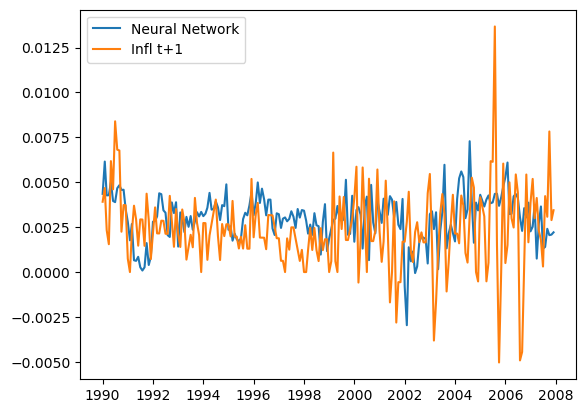

In [113]:
model='Neural Network'
plt.plot(preds[model],label=model)
plt.plot(preds['infl_tp1'], label='Infl t+1')
plt.legend()

0.009131951816223505


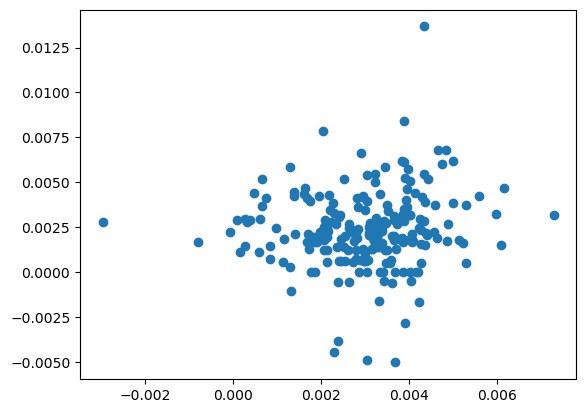

In [114]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(preds[model].to_frame(),preds['infl_tp1'].to_frame())
print(lr.score(preds[model].to_frame(),preds['infl_tp1'].to_frame()))
plt.scatter(preds[model], preds['infl_tp1'])

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(preds['infl_tp1'],preds[model],squared=True))
print(mean_absolute_error(preds['infl_tp1'],preds[model]))

6.26060399624141e-06
0.0019350999489791024


In [122]:
def concat_cvresults(path, cols):
    results = pd.DataFrame()
    for file_path in glob.glob(path):
        year = file_path.split('_')[1]
        cv_results = pd.read_csv(file_path)
        best_model_results = cv_results[cv_results['rank_test_score'] == 1][cols]
        best_model_results['year'] = year
        results = pd.concat([results, best_model_results],axis=0)
        
    return results

In [123]:
cv_cols = ['param_architecture', 'param_l2', 'param_lr', 'mean_train_score', 'mean_test_score']
path = 'C:/Users/Robpr/OneDrive/Documents/Projects/InflationForecasting/CVResults/Neural Network_*_infl_tp1_cvresults.csv'
cv_results = concat_cvresults(path, cv_cols)
cv_results

,param_architecture,param_l2,param_lr,mean_train_score,mean_test_score,year
15,[32],10.0,0.0001,-0.001921,-0.002366,1989
183,[64],10.0,0.0001,-0.001981,-0.002306,1990
15,[32],10.0,0.0001,-0.001981,-0.002061,1991
183,[64],10.0,0.0001,-0.002025,-0.001959,1992
183,[64],10.0,0.0001,-0.002063,-0.001856,1993
183,[64],10.0,0.0001,-0.002140,-0.001739,1994
183,[64],10.0,0.0001,-0.002062,-0.001900,1995
183,[64],10.0,0.0001,-0.002261,-0.001561,1996
15,[32],10.0,0.0001,-0.002186,-0.001599,1997
15,[32],10.0,0.0001,-0.002323,-0.001624,1998
